In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import keras
import pywt

Using TensorFlow backend.


In [2]:
data = pd.read_csv("./data/icici_04-18_clean.csv")

In [3]:
data.values.shape

(3551, 1)

In [4]:
data.values[:-1].ravel()

array([  52.163601,   52.745399,   53.6273  , ...,  355.600006,
        348.200012,  345.549988])

In [5]:
train = data[0: int(math.floor(0.75 * len(data)))]
valid = data[int(math.floor(0.75 * len(data))):int(math.floor(0.85 * len(data)))]
test = data[int(math.floor(0.85 * len(data))):]

In [6]:
train = train.values.ravel()
valid = valid.values.ravel()
test = test.values.ravel()

In [7]:
def create_features(data):
    x, y = [], []
    for i in range(8,len(data)):
        x.append(pywt.swt(data[i-8:i], wavelet='db3')[2][0])
        y.append(data[i])
    x, y = np.array(x), np.array(y)
    return x, y 

In [8]:
x_train, y_train = create_features(train)
x_valid, y_valid = create_features(valid)
x_test, y_test = create_features(test)

In [9]:
x_train.shape

(2655, 8)

In [10]:
y_train

array([  57.9818  ,   57.5182  ,   57.718201, ...,  288.      ,
        284.454987,  273.27301 ])

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=1024, activation='relu',input_dim=x_train.shape[1]))
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=32, activation='relu'))
model.add(keras.layers.Dense(units=16, activation='relu'))
model.add(keras.layers.Dense(1))
model.summary()
model.compile(loss=keras.losses.mse, optimizer=keras.optimizers.Adam(lr = 0.00001, decay = 0.00002))
model.fit(x_train, y_train, epochs=50, batch_size=8, verbose=1, validation_data=(x_valid, y_valid) )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              9216      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
__________

In [12]:
pred = model.predict(x_test)

In [13]:
rms=np.sqrt(np.mean(np.power((valid-pred),2)))
print(rms)

83.4977231959


In [14]:
pred.shape

(525, 1)

In [15]:
import seaborn as sns
sns.set(font_scale = 1.8)

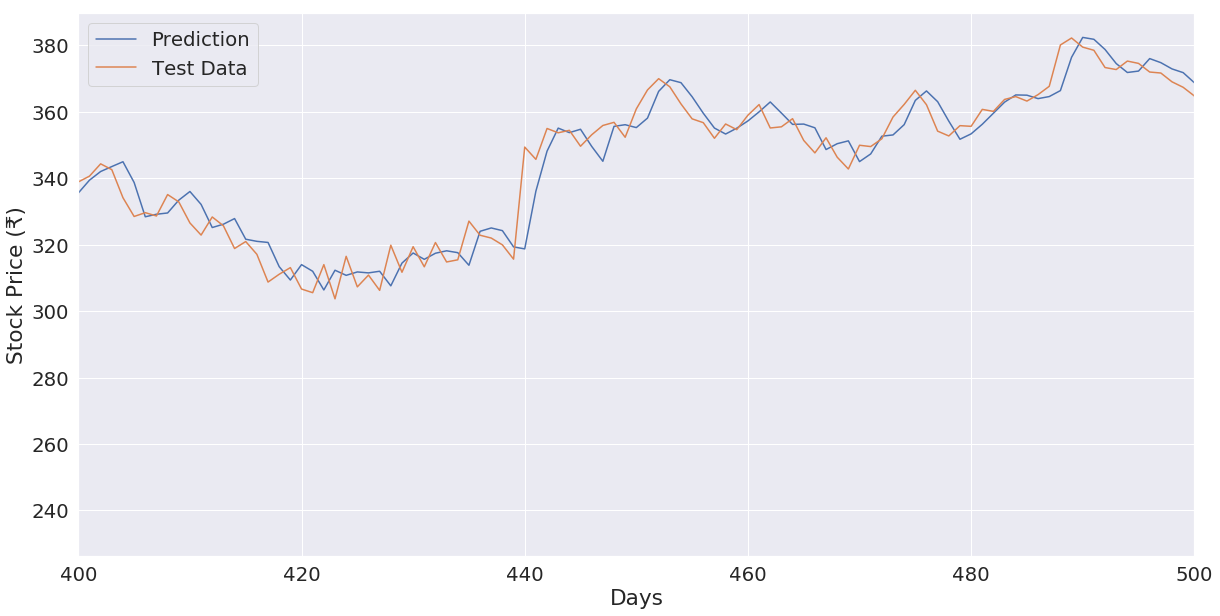

In [17]:
plt.figure(figsize=(20,10))
plt.plot(pred.ravel(), label = 'Prediction' )
plt.plot(y_test, label = 'Test Data')
plt.xlim(400,500)
plt.legend()
plt.xlabel("Days")
plt.ylabel("Stock Price (\u20B9)")
plt.savefig("Prediction using wavelet analysis.svg")
plt.show()